In [1]:
import pandas as pd
import numpy as np
import folium
import requests
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# Credentials for BingMaps
BING_KEY = 'DELETED'

In [28]:
# Credentials for Foursquare (NEED TO DELETE AFTER)
CLIENT_ID = 'DELETED' # your Foursquare ID
CLIENT_SECRET = 'DELETED' # your Foursquare Secret
VERSION = 'DELETED' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DELETED
CLIENT_SECRET:DELETED


In [4]:
# Getting latitude and longitude of Bangkok, Thailand.
target_location = '130 Samsen Soi 2, Bangkok, Thailand'

geolocator = Nominatim(user_agent='bangkok_explorer')
location = geolocator.geocode(target_location)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of Bangkok, Thailand: {}, {}.'.format(latitude, longitude))

Coordinates of Bangkok, Thailand: 13.7627862, 100.499614.


In [5]:
# Obtaining Traffic data for Bangkok Area
SouthLatitude = 13.3019
WestLongitude = 100.1208
NorthLatitude = 14.1200
EastLongitude = 100.4739
url = 'http://dev.virtualearth.net/REST/v1/Traffic/Incidents/{},{},{},{}?key={}'.format(
    SouthLatitude,
    WestLongitude,
    NorthLatitude,
    EastLongitude,
    BING_KEY
    )
url

'http://dev.virtualearth.net/REST/v1/Traffic/Incidents/13.3019,100.1208,14.12,100.4739?key=DELETED'

In [29]:
# Getting top 100 venues in Bangkok
LIMIT = 100
radius = 100000
offset=0
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    offset)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=DELETED&client_secret=DELETED&v=DELETED&ll=13.7627862,100.499614&radius=100000&limit=100&offset=0'

In [7]:
traffic_results = requests.get(url).json()
traffic_results['response']['groups'][0]['items'][0]['venue']

{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_jazzclub_',
    'suffix': '.png'},
   'id': '4bf58dd8d48988d1e7931735',
   'name': 'Jazz Club',
   'pluralName': 'Jazz Clubs',
   'primary': True,
   'shortName': 'Jazz Club'}],
 'id': '4dfb6e666284607895334ba5',
 'location': {'address': 'Samsen Rd.',
  'cc': 'TH',
  'city': 'พระนคร',
  'country': 'ประเทศไทย',
  'distance': 88,
  'formattedAddress': ['Samsen Rd.',
   'พระนคร',
   'กรุงเทพมหานคร 10200',
   'ประเทศไทย'],
  'labeledLatLngs': [{'label': 'display',
    'lat': 13.763043150306821,
    'lng': 100.49883860848884}],
  'lat': 13.763043150306821,
  'lng': 100.49883860848884,
  'postalCode': '10200',
  'state': 'กรุงเทพมหานคร'},
 'name': 'Adhere the 13th Blues Bar',
 'photos': {'count': 0, 'groups': []}}

It seems that the Bing Map Data is sparse for Bangkok, Thailand area for traffic incidents! So we are going to need to find another route.

In [8]:
# Calling the Foursquare API
results = requests.get(url).json()
results['response']['groups'][0]['items'][0]['venue']

{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_jazzclub_',
    'suffix': '.png'},
   'id': '4bf58dd8d48988d1e7931735',
   'name': 'Jazz Club',
   'pluralName': 'Jazz Clubs',
   'primary': True,
   'shortName': 'Jazz Club'}],
 'id': '4dfb6e666284607895334ba5',
 'location': {'address': 'Samsen Rd.',
  'cc': 'TH',
  'city': 'พระนคร',
  'country': 'ประเทศไทย',
  'distance': 88,
  'formattedAddress': ['Samsen Rd.',
   'พระนคร',
   'กรุงเทพมหานคร 10200',
   'ประเทศไทย'],
  'labeledLatLngs': [{'label': 'display',
    'lat': 13.763043150306821,
    'lng': 100.49883860848884}],
  'lat': 13.763043150306821,
  'lng': 100.49883860848884,
  'postalCode': '10200',
  'state': 'กรุงเทพมหานคร'},
 'name': 'Adhere the 13th Blues Bar',
 'photos': {'count': 0, 'groups': []}}

In [9]:
# Grabbing the data.
venues = results['response']['groups'][0]['items']

all_venues = json_normalize(venues)

all_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [10]:
# Lets look at the raw data.
print(all_venues.shape)
all_venues.head()

(100, 22)


,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dfb6e666284607895334ba5-0,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",4dfb6e666284607895334ba5,Samsen Rd.,TH,พระนคร,ประเทศไทย,NaN,...,"[{'label': 'display', 'lat': 13.76304315030682...",13.763043,100.498839,NaN,10200,กรุงเทพมหานคร,Adhere the 13th Blues Bar,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4fd6b0f0e4b0a25e3aaaa1ff-1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",4fd6b0f0e4b0a25e3aaaa1ff,23,TH,พระนคร,ประเทศไทย,NaN,...,"[{'label': 'display', 'lat': 13.76230825218113...",13.762308,100.493020,Chana Songkram,10200,กรุงเทพมหานคร,Riva Surya Bangkok,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b0587f9f964a52001aa22e3-2,"[{'id': '52e81612bcbc57f1066b7a3e', 'name': 'B...",4b0587f9f964a52001aa22e3,Na Phra Lan Rd,TH,พระนคร,ประเทศไทย,Maha Rat Rd,...,"[{'label': 'display', 'lat': 13.75173464369186...",13.751735,100.492651,NaN,10200,กรุงเทพมหานคร,Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4e3105c381302aa582e214a7-3,"[{'id': '52e81612bcbc57f1066b7a14', 'name': 'P...",4e3105c381302aa582e214a7,The Grand Palace,TH,พระนคร,ประเทศไทย,NaN,...,"[{'label': 'display', 'lat': 13.750105, 'lng':...",13.750105,100.490524,Phra Borom Maha Ratchawang,10200,กรุงเทพมหานคร,Dusit Maha Prasat Throne Hall (พระที่นั่งดุสิต...,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b492992f964a520596826e3-4,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",4b492992f964a520596826e3,151/1 Nakhon Chaisi Rd,TH,ดุสิต,ประเทศไทย,NaN,...,"[{'label': 'display', 'lat': 13.78480512163128...",13.784805,100.512836,NaN,10300,กรุงเทพมหานคร,Look Chin Sri Yan (ลูกชิ้นศรีย่าน),0,[],NaN


In [11]:
# Grabbing all the data we can
for offset in range(1, 20):
    LIMIT = 100
    radius = 100000
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT,
        offset)
    all_venues = pd.concat([all_venues, json_normalize(requests.get(url).json()['response']['groups'][0]['items'])], ignore_index=True)

all_venues.shape

(2000, 22)

In [12]:
# Looking for interesting columns that we should keep.
for c in all_venues.columns:
    try:
        print(c)
        print(all_venues[c].unique())
    except:
        continue

reasons.count
[0]
reasons.items
referralId
['e-0-4dfb6e666284607895334ba5-0' 'e-0-4fd6b0f0e4b0a25e3aaaa1ff-1'
 'e-0-4b0587f9f964a52001aa22e3-2' 'e-0-4e3105c381302aa582e214a7-3'
 'e-0-4b492992f964a520596826e3-4' 'e-0-4da03dcfa77d816ea6b81309-5'
 'e-0-4c80b79374d7b60cabdc6fd8-6' 'e-0-4d59edaafe7c224b8f997db5-7'
 'e-0-55461e9b498e777ecbdb0696-8' 'e-0-50568fd6e4b02204c3b9dd0b-9'
 'e-0-54e2cdc7498eefaf2e840b85-10' 'e-0-4b377134f964a520154125e3-11'
 'e-0-509a31b8e4b07ae84f975465-12' 'e-0-4c16c642955976b0e31ba5f6-13'
 'e-0-500532c6e4b0f0192ae31b47-14' 'e-0-4bfde0aef7c82d7fa0e98e04-15'
 'e-0-54a15cd5498e598692a22594-16' 'e-0-5131c9a5e4b09cc35d6934f3-17'
 'e-0-532c0ca5498e9f9699c35813-18' 'e-0-4d7f5c0a4219a1cdedaa72d3-19'
 'e-0-4b41cdfbf964a52009c925e3-20' 'e-0-5ad5e0dfcf72a0760b6d82d8-21'
 'e-0-51235f11e4b05e2a39aa10e6-22' 'e-0-51a257a5498e7f0ebdea7108-23'
 'e-0-58edbb2214f8f4278e385b8f-24' 'e-0-4baaeda4f964a520428e3ae3-25'
 'e-0-54a8c73f498e9be466164ab5-26' 'e-0-4c2adbf3ae6820a1e9011743-27'
 

In [13]:
# Grabbing interesting columns
filtered_columns = ['venue.categories', 'venue.location.city', 'venue.location.lat', 'venue.location.lng', 'venue.name']
df = all_venues.loc[:, filtered_columns]
df.head()

,venue.categories,venue.location.city,venue.location.lat,venue.location.lng,venue.name
0,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",พระนคร,13.763043,100.498839,Adhere the 13th Blues Bar
1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",พระนคร,13.762308,100.493020,Riva Surya Bangkok
2,"[{'id': '52e81612bcbc57f1066b7a3e', 'name': 'B...",พระนคร,13.751735,100.492651,Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...
3,"[{'id': '52e81612bcbc57f1066b7a14', 'name': 'P...",พระนคร,13.750105,100.490524,Dusit Maha Prasat Throne Hall (พระที่นั่งดุสิต...
4,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",ดุสิต,13.784805,100.512836,Look Chin Sri Yan (ลูกชิ้นศรีย่าน)


In [14]:
# Lets look at the amount of missing data in each column.
print(df.shape)
df.isna().sum()

(2000, 5)


venue.categories        0
venue.location.city    20
venue.location.lat      0
venue.location.lng      0
venue.name              0
dtype: int64

In [15]:
# Looking at uniqueness of each column.
for i in df.columns:
    try:
        print(i)
        print(df[i].unique())
    except:
        continue

venue.categories
venue.location.city
['พระนคร' 'ดุสิต' 'Chana Songkhram' 'ป้อมปราบศัตรูพ่าย' 'บางกอกน้อย'
 'ปทุมวัน' 'พญาไท' 'บางกอกใหญ่' 'บางพลัด' 'ราชเทวี' 'คลองสาน' 'บางรัก'
 'บางคอแหลม' 'Pathumwan' 'วัฒนา' 'ธนบุรี' 'จตุจักร' 'สาทร' nan 'คลองเตย'
 'ภาษีเจริญ' 'บางใหญ่' 'Din Daeng' 'ยานนาวา' 'ห้วยขวาง' 'เมืองนนทบุรี'
 'ทวีวัฒนา' 'บางซื่อ' 'ลาดพร้าว' 'บางแค' 'พระไขนง' 'วังทองหลาง']
venue.location.lat
[13.76304315 13.76230825 13.75173464 13.750105   13.78480512 13.76236268
 13.74457758 13.76494838 13.74093665 13.75978852 13.72054164 13.7458388
 13.77226575 13.7239926  13.78187876 13.73967639 13.77956334 13.73055253
 13.743696   13.7793751  13.74635415 13.739827   13.744541   13.75593072
 13.74650859 13.76841854 13.77626144 13.734807   13.74826017 13.74697923
 13.78995196 13.74422676 13.7241436  13.74664581 13.74587903 13.74676056
 13.7341441  13.72302222 13.72202903 13.74715965 13.74607527 13.71774137
 13.73959827 13.73098493 13.72625294 13.72867334 13.70914072 13.74883717
 13.7450004 

In [16]:
# Exploring the categories for feature extraction.
for i in df['venue.categories']:
    print(i)

[{'id': '4bf58dd8d48988d1e7931735', 'name': 'Jazz Club', 'pluralName': 'Jazz Clubs', 'shortName': 'Jazz Club', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_jazzclub_', 'suffix': '.png'}, 'primary': True}]
[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]
[{'id': '52e81612bcbc57f1066b7a3e', 'name': 'Buddhist Temple', 'pluralName': 'Buddhist Temples', 'shortName': 'Buddhist Temple', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_', 'suffix': '.png'}, 'primary': True}]
[{'id': '52e81612bcbc57f1066b7a14', 'name': 'Palace', 'pluralName': 'Palaces', 'shortName': 'Palace', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/default_', 'suffix': '.png'}, 'primary': True}]
[{'id': '4bf58dd8d48988d1d1941735', 'name': 'Noodle House', 'pluralNa

[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]
[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]
[{'id': '4bf58dd8d48988d1d1941735', 'name': 'Noodle House', 'pluralName': 'Noodle Houses', 'shortName': 'Noodles', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/ramen_', 'suffix': '.png'}, 'primary': True}]
[{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'Massage Studio', 'pluralName': 'Massage Studios', 'shortName': 'Massage Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_', 'suffix': '.png'}, 'primary': True}]
[{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'ico

In [17]:
df['Category'] = df.apply(lambda row: row['venue.categories'][0]['name'], axis=1)
print(df.head())
df.Category.unique()

                                    venue.categories venue.location.city  \
0  [{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...              พระนคร   
1  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...              พระนคร   
2  [{'id': '52e81612bcbc57f1066b7a3e', 'name': 'B...              พระนคร   
3  [{'id': '52e81612bcbc57f1066b7a14', 'name': 'P...              พระนคร   
4  [{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...               ดุสิต   

   venue.location.lat  venue.location.lng  \
0           13.763043          100.498839   
1           13.762308          100.493020   
2           13.751735          100.492651   
3           13.750105          100.490524   
4           13.784805          100.512836   

                                          venue.name         Category  
0                          Adhere the 13th Blues Bar        Jazz Club  
1                                 Riva Surya Bangkok            Hotel  
2  Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...  Bu

array(['Jazz Club', 'Hotel', 'Buddhist Temple', 'Palace', 'Noodle House',
       'Massage Studio', 'Shrine', 'Farm', 'Coffee Shop', 'Factory',
       'Bookstore', 'Park', 'Resort', 'Gym / Fitness Center',
       'Japanese Restaurant', 'Tour Provider', 'Historic Site',
       'Som Tum Restaurant', 'Supermarket', 'Bar', 'Outdoor Sculpture',
       'Hostel', 'Shopping Mall', 'Dessert Shop', 'Hotel Bar',
       'Multiplex', 'Thai Restaurant', 'Boutique', 'Indian Restaurant',
       'Sports Club', 'Tonkatsu Restaurant', 'Asian Restaurant',
       'Restaurant', 'Vegetarian / Vegan Restaurant', 'Clothing Store',
       'Café', 'Cocktail Bar', 'Spa', 'Library', 'Flea Market',
       'Art Gallery', 'Bakery', 'BBQ Joint', 'Surf Spot',
       'Miscellaneous Shop', 'Night Market', 'Ice Cream Shop',
       'Sushi Restaurant', 'Chinese Restaurant', 'Vietnamese Restaurant',
       'Seafood Restaurant'], dtype=object)

In [18]:
# Replace categories with something more similiar to each other.
def replace_category(df):
    print(df)
    cat = df['Category']
    if 'Restaurant' in cat or 'Joint' in cat or 'House' in cat or 'Place' in cat or 'Bar' in cat or 'Café' in cat or 'Pub' in cat:
        df.Category = 'Food'
    elif 'Hotel' in cat or 'Spa' in cat or 'Massage' in cat or 'Hostel' in cat:
        df.Category = 'Service'
    else:
        df.Category ='Attraction'
    return df

print(df)
df_new = df.apply(replace_category, axis=1)
df_new

                                       venue.categories venue.location.city  \
0     [{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...              พระนคร   
1     [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...              พระนคร   
2     [{'id': '52e81612bcbc57f1066b7a3e', 'name': 'B...              พระนคร   
3     [{'id': '52e81612bcbc57f1066b7a14', 'name': 'P...              พระนคร   
4     [{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...               ดุสิต   
5     [{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'M...     Chana Songkhram   
6     [{'id': '4eb1d80a4b900d56c88a45ff', 'name': 'S...   ป้อมปราบศัตรูพ่าย   
7     [{'id': '4bf58dd8d48988d15b941735', 'name': 'F...               ดุสิต   
8     [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...              พระนคร   
9     [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...          บางกอกน้อย   
10    [{'id': '4eb1bea83b7b6f98df247e06', 'name': 'F...              พระนคร   
11    [{'id': '4bf58dd8d48988d114951735', 'name': 'B

Name: 125, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...
venue.location.city                                              ปทุมวัน
venue.location.lat                                               13.7348
venue.location.lng                                               100.524
venue.name                                        Rod Dee Det (รสดีเด็ด)
Category                                                    Noodle House
Name: 126, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...
venue.location.city                                              ปทุมวัน
venue.location.lat                                               13.7483
venue.location.lng                                               100.535
venue.name                                  Siam Kempinski Hotel Bangkok
Category                                                           Hotel
Name: 127, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1f

Name: 215, dtype: object
venue.categories       [{'id': '4deefb944765f83613cdba6e', 'name': 'H...
venue.location.city                                           บางกอกใหญ่
venue.location.lat                                               13.7437
venue.location.lng                                               100.489
venue.name                            Wat Arun Prang (พระปรางค์วัดอรุณฯ)
Category                                                   Historic Site
Name: 216, dtype: object
venue.categories       [{'id': '56aa371be4b08b9a8d573502', 'name': 'S...
venue.location.city                                              บางพลัด
venue.location.lat                                               13.7794
venue.location.lng                                               100.477
venue.name                                          Ta Bun Tum (ตะบันตำ)
Category                                              Som Tum Restaurant
Name: 217, dtype: object
venue.categories       [{'id': '52f2ab2ebcbc57f10

Name: 265, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d16d941735', 'name': 'C...
venue.location.city                                               บางรัก
venue.location.lat                                               13.7217
venue.location.lng                                               100.524
venue.name                                                  Luka (ลูก้า)
Category                                                            Café
Name: 266, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...
venue.location.city                                                 สาทร
venue.location.lat                                               13.7235
venue.location.lng                                               100.541
venue.name                                         The Sukhothai Bangkok
Category                                                           Hotel
Name: 267, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d11

Name: 379, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1df931735', 'name': 'B...
venue.location.city                                                วัฒนา
venue.location.lat                                               13.7292
venue.location.lng                                               100.581
venue.name                                       Ginzado (Ginzado (銀座堂))
Category                                                       BBQ Joint
Name: 380, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...
venue.location.city                                              คลองเตย
venue.location.lat                                               13.7166
venue.location.lng                                               100.561
venue.name                                  Heng Chun Seng (เฮ้งชุนเส็ง)
Category                                                    Noodle House
Name: 381, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d14

Name: 474, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d163941735', 'name': 'P...
venue.location.city                                              จตุจักร
venue.location.lat                                               13.8067
venue.location.lng                                               100.552
venue.name             Queen Sirikit Park (สวนสมเด็จพระนางเจ้าสิริกิต...
Category                                                            Park
Name: 475, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d12f951735', 'name': 'R...
venue.location.city                                               พระนคร
venue.location.lat                                               13.7182
venue.location.lng                                               100.546
venue.name                                             U Sathorn Bangkok
Category                                                          Resort
Name: 476, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d16

Name: 526, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...
venue.location.city                                               พระนคร
venue.location.lat                                               13.7241
venue.location.lng                                               100.514
venue.name                                                The Bamboo Bar
Category                                                       Hotel Bar
Name: 527, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...
venue.location.city                                              ปทุมวัน
venue.location.lat                                               13.7466
venue.location.lng                                               100.539
venue.name                                 centralwOrld (เซ็นทรัลเวิลด์)
Category                                                   Shopping Mall
Name: 528, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d18

Name: 656, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...
venue.location.city                                                วัฒนา
venue.location.lat                                               13.7479
venue.location.lng                                               100.552
venue.name                                                      Na Aroon
Category                                   Vegetarian / Vegan Restaurant
Name: 657, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d103951735', 'name': 'C...
venue.location.city                                              ปทุมวัน
venue.location.lat                                                13.747
venue.location.lng                                               100.538
venue.name                                             UNIQLO (ยูนิโคล่)
Category                                                  Clothing Store
Name: 658, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1f

Name: 734, dtype: object
venue.categories       [{'id': '52e81612bcbc57f1066b7a2e', 'name': 'S...
venue.location.city                                              ปทุมวัน
venue.location.lat                                               13.7396
venue.location.lng                                               100.536
venue.name             The Royal Bangkok Sports Club (ราชกรีฑาสโมสร) ...
Category                                                     Sports Club
Name: 735, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d163941735', 'name': 'P...
venue.location.city                                              ปทุมวัน
venue.location.lat                                                13.731
venue.location.lng                                               100.542
venue.name                                    Lumphini Park (สวนลุมพินี)
Category                                                            Park
Name: 736, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1f

Name: 785, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d111941735', 'name': 'J...
venue.location.city                                                วัฒนา
venue.location.lat                                               13.7368
venue.location.lng                                               100.584
venue.name                                                   Kenji's Lab
Category                                             Japanese Restaurant
Name: 786, dtype: object
venue.categories       [{'id': '53e510b7498ebcb1801b55d4', 'name': 'N...
venue.location.city                                            Din Daeng
venue.location.lat                                               13.7668
venue.location.lng                                               100.569
venue.name               Train Night Market Ratchada (ตลาดนัดรถไฟ รัชดา)
Category                                                    Night Market
Name: 787, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d14

Name: 888, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...
venue.location.city                                              คลองเตย
venue.location.lat                                                13.721
venue.location.lng                                               100.569
venue.name                                                      manycups
Category                                                  Ice Cream Shop
Name: 889, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...
venue.location.city                                                วัฒนา
venue.location.lat                                               13.7346
venue.location.lng                                               100.566
venue.name                                                ISAO (อิซาโอะ)
Category                                                Sushi Restaurant
Name: 890, dtype: object
venue.categories       [{'id': '52f2ab2ebcbc57f10

Name: 996, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d149941735', 'name': 'T...
venue.location.city                                              คลองเตย
venue.location.lat                                               13.7267
venue.location.lng                                               100.575
venue.name                              Saeng Chai Pochana (แสงชัยโภชนา)
Category                                                 Thai Restaurant
Name: 997, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...
venue.location.city                                              บางซื่อ
venue.location.lat                                               13.8411
venue.location.lng                                               100.534
venue.name                                        Starbucks (สตาร์บัคส์)
Category                                                     Coffee Shop
Name: 998, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1e

Name: 1046, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...
venue.location.city                                               พระนคร
venue.location.lat                                                 13.73
venue.location.lng                                                100.53
venue.name                                           Le Méridien Bangkok
Category                                                           Hotel
Name: 1047, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...
venue.location.city                                              ปทุมวัน
venue.location.lat                                               13.7355
venue.location.lng                                               100.546
venue.name                                        Starbucks (สตาร์บัคส์)
Category                                                     Coffee Shop
Name: 1048, dtype: object
venue.categories       [{'id': '4bf58dd8d48988

Name: 1174, dtype: object
venue.categories       [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...
venue.location.city                                                วัฒนา
venue.location.lat                                               13.7323
venue.location.lng                                               100.569
venue.name                            Gourmet Market (กูร์เมต์ มาร์เก็ต)
Category                                                     Supermarket
Name: 1175, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...
venue.location.city                                              คลองเตย
venue.location.lat                                               13.7171
venue.location.lng                                               100.571
venue.name                                        Starbucks (สตาร์บัคส์)
Category                                                     Coffee Shop
Name: 1176, dtype: object
venue.categories       [{'id': '4bf58dd8d48988

Name: 1272, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d149941735', 'name': 'T...
venue.location.city                                            ภาษีเจริญ
venue.location.lat                                               13.7171
venue.location.lng                                               100.446
venue.name                                Kha Moo Bang Wa (ขาหมูบางหว้า)
Category                                                 Thai Restaurant
Name: 1273, dtype: object
venue.categories       [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...
venue.location.city                                                วัฒนา
venue.location.lat                                               13.7323
venue.location.lng                                               100.569
venue.name                            Gourmet Market (กูร์เมต์ มาร์เก็ต)
Category                                                     Supermarket
Name: 1274, dtype: object
venue.categories       [{'id': '4bf58dd8d48988

Name: 1301, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d175941735', 'name': 'G...
venue.location.city                                              ปทุมวัน
venue.location.lat                                               13.7397
venue.location.lng                                               100.536
venue.name                                             RBSC Fitness Club
Category                                            Gym / Fitness Center
Name: 1302, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d111941735', 'name': 'J...
venue.location.city                                                พญาไท
venue.location.lat                                               13.7796
venue.location.lng                                               100.539
venue.name                                             Hanazen (ฮานะเซน)
Category                                             Japanese Restaurant
Name: 1303, dtype: object
venue.categories       [{'id': '56aa371be4b08b

Name: 1415, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...
venue.location.city                                                ดุสิต
venue.location.lat                                                 13.79
venue.location.lng                                               100.515
venue.name                                        Starbucks (สตาร์บัคส์)
Category                                                     Coffee Shop
Name: 1416, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...
venue.location.city                                               พระนคร
venue.location.lat                                               13.7442
venue.location.lng                                               100.534
venue.name                                       After You (อาฟเตอร์ ยู)
Category                                                    Dessert Shop
Name: 1417, dtype: object
venue.categories       [{'id': '4bf58dd8d48988

Name: 1527, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d163941735', 'name': 'P...
venue.location.city                                              ปทุมวัน
venue.location.lat                                                13.731
venue.location.lng                                               100.542
venue.name                                    Lumphini Park (สวนลุมพินี)
Category                                                            Park
Name: 1528, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...
venue.location.city                                               บางรัก
venue.location.lat                                               13.7263
venue.location.lng                                               100.543
venue.name                                            SO Sofitel Bangkok
Category                                                           Hotel
Name: 1529, dtype: object
venue.categories       [{'id': '4bf58dd8d48988

Name: 1595, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...
venue.location.city                                              จตุจักร
venue.location.lat                                               13.8441
venue.location.lng                                               100.569
venue.name                                        Starbucks (สตาร์บัคส์)
Category                                                     Coffee Shop
Name: 1596, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d114951735', 'name': 'B...
venue.location.city                                             ลาดพร้าว
venue.location.lat                                               13.8046
venue.location.lng                                               100.615
venue.name                           Think Space B2S (ธิงค์สเปซ บีทูเอส)
Category                                                       Bookstore
Name: 1597, dtype: object
venue.categories       [{'id': '4bf58dd8d48988

Name: 1724, dtype: object
venue.categories       [{'id': '52e81612bcbc57f1066b7a2e', 'name': 'S...
venue.location.city                                              ปทุมวัน
venue.location.lat                                               13.7396
venue.location.lng                                               100.536
venue.name             The Royal Bangkok Sports Club (ราชกรีฑาสโมสร) ...
Category                                                     Sports Club
Name: 1725, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d163941735', 'name': 'P...
venue.location.city                                              ปทุมวัน
venue.location.lat                                                13.731
venue.location.lng                                               100.542
venue.name                                    Lumphini Park (สวนลุมพินี)
Category                                                            Park
Name: 1726, dtype: object
venue.categories       [{'id': '4bf58dd8d48988

Name: 1801, dtype: object
venue.categories       [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...
venue.location.city                                              ปทุมวัน
venue.location.lat                                               13.7464
venue.location.lng                                               100.535
venue.name                            Gourmet Market (กูร์เมต์ มาร์เก็ต)
Category                                                     Supermarket
Name: 1802, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d116941735', 'name': 'B...
venue.location.city                                    ป้อมปราบศัตรูพ่าย
venue.location.lat                                               13.7398
venue.location.lng                                               100.514
venue.name                                          Wallflowers Upstairs
Category                                                             Bar
Name: 1803, dtype: object
venue.categories       [{'id': '52e81612bcbc57

Name: 1869, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...
venue.location.city                                              บางใหญ่
venue.location.lat                                               13.8205
venue.location.lng                                                100.45
venue.name                                        Starbucks (สตาร์บัคส์)
Category                                                     Coffee Shop
Name: 1870, dtype: object
venue.categories       [{'id': '4bf58dd8d48988d1e3941735', 'name': 'S...
venue.location.city                                              คลองเตย
venue.location.lat                                               13.7205
venue.location.lng                                               100.567
venue.name                                      Flow House (โฟลว์ เฮาส์)
Category                                                       Surf Spot
Name: 1871, dtype: object
venue.categories       [{'id': '4bf58dd8d48988

,venue.categories,venue.location.city,venue.location.lat,venue.location.lng,venue.name,Category
0,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",พระนคร,13.763043,100.498839,Adhere the 13th Blues Bar,Attraction
1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",พระนคร,13.762308,100.493020,Riva Surya Bangkok,Service
2,"[{'id': '52e81612bcbc57f1066b7a3e', 'name': 'B...",พระนคร,13.751735,100.492651,Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...,Attraction
3,"[{'id': '52e81612bcbc57f1066b7a14', 'name': 'P...",พระนคร,13.750105,100.490524,Dusit Maha Prasat Throne Hall (พระที่นั่งดุสิต...,Attraction
4,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",ดุสิต,13.784805,100.512836,Look Chin Sri Yan (ลูกชิ้นศรีย่าน),Food
5,"[{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'M...",Chana Songkhram,13.762363,100.495126,Massage In Garden,Service
6,"[{'id': '4eb1d80a4b900d56c88a45ff', 'name': 'S...",ป้อมปราบศัตรูพ่าย,13.744578,100.510755,Tai Hong Kong Shrine (ศาลเจ้าไต้ฮงกง),Attraction
7,"[{'id': '4bf58dd8d48988d15b941735', 'name': 'F...",ดุสิต,13.764948,100.520870,โครงการส่วนพระองค์ สวนจิตรลดา,Attraction
8,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",พระนคร,13.740937,100.495394,Starbucks (สตาร์บัคส์),Attraction
9,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",บางกอกน้อย,13.759789,100.486097,Starbucks (สตาร์บัคส์),Attraction


In [19]:
# Lets create numeric categories for the city.
data = pd.concat([df_new, pd.get_dummies(df_new['Category'])], axis=1)
data.shape

(2000, 9)

In [20]:
# Grabbing features we want and renaming for convenience.
data.columns = ['venue.categories', 'venue.location.city', 'Latitude', 'Longitude', 'Venue_Name', 'Category', 'Attraction', 'Food', 'Service']
data_columns = data.columns
print(data_columns)
df_final = data[data_columns[2:]].set_index('Venue_Name')
df_final.head()

Index(['venue.categories', 'venue.location.city', 'Latitude', 'Longitude',
       'Venue_Name', 'Category', 'Attraction', 'Food', 'Service'],
      dtype='object')


,Latitude,Longitude,Category,Attraction,Food,Service
Venue_Name,,,,,,
Adhere the 13th Blues Bar,13.763043,100.498839,Attraction,1,0,0
Riva Surya Bangkok,13.762308,100.493020,Service,0,0,1
Temple of the Emerald Buddha (วัดพระศรีรัตนศาสดาราม (วัดพระแก้ว)),13.751735,100.492651,Attraction,1,0,0
Dusit Maha Prasat Throne Hall (พระที่นั่งดุสิตมหาปราสาท),13.750105,100.490524,Attraction,1,0,0
Look Chin Sri Yan (ลูกชิ้นศรีย่าน),13.784805,100.512836,Food,0,1,0


In [21]:
df_final.drop_duplicates()

,Latitude,Longitude,Category,Attraction,Food,Service
Venue_Name,,,,,,
Adhere the 13th Blues Bar,13.763043,100.498839,Attraction,1,0,0
Riva Surya Bangkok,13.762308,100.493020,Service,0,0,1
Temple of the Emerald Buddha (วัดพระศรีรัตนศาสดาราม (วัดพระแก้ว)),13.751735,100.492651,Attraction,1,0,0
Dusit Maha Prasat Throne Hall (พระที่นั่งดุสิตมหาปราสาท),13.750105,100.490524,Attraction,1,0,0
Look Chin Sri Yan (ลูกชิ้นศรีย่าน),13.784805,100.512836,Food,0,1,0
Massage In Garden,13.762363,100.495126,Service,0,0,1
Tai Hong Kong Shrine (ศาลเจ้าไต้ฮงกง),13.744578,100.510755,Attraction,1,0,0
โครงการส่วนพระองค์ สวนจิตรลดา,13.764948,100.520870,Attraction,1,0,0
Starbucks (สตาร์บัคส์),13.740937,100.495394,Attraction,1,0,0


In [22]:
# Creating map of Thailand.
map_bangkok = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, name in zip(df_final['Latitude'], df_final['Longitude'], df_final['Category']):
    folium.Marker(
        [lat, lng],
        popup=name,).add_to(map_bangkok)  


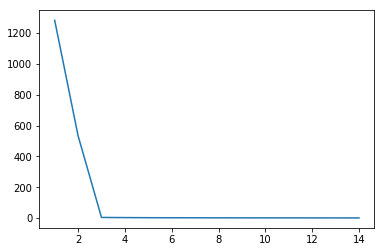

In [23]:
# Running data through model to determine optimal K with all features.
k_clusters = list(range(1, 15))
inertia = []
for k in k_clusters:
    model = KMeans(n_clusters=k)
    model = model.fit(df_final.drop('Category', axis=1))
    inertia.append(model.inertia_)
    
plt.plot(k_clusters, inertia)

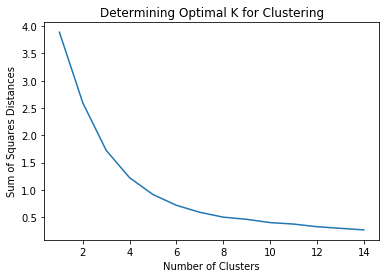

In [27]:
# Running data through model to determine optimal K with only latitude and longitude.
k_clusters = list(range(1, 15))
inertia = []
for k in k_clusters:
    model = KMeans(n_clusters=k)
    model = model.fit(df_final[['Latitude', 'Longitude']])
    inertia.append(model.inertia_)

plt.plot(k_clusters, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Distances')
plt.title('Determining Optimal K for Clustering')
plt.show()

In [25]:
# Creating the final clusters.
model = KMeans(n_clusters=7)
model = model.fit(df_final[['Latitude', 'Longitude']])
clustered_group = df_final.copy()
clustered_group.insert(0, 'Cluster Labels', model.labels_)
clustered_group.head()

,Cluster Labels,Latitude,Longitude,Category,Attraction,Food,Service
Venue_Name,,,,,,,
Adhere the 13th Blues Bar,5,13.763043,100.498839,Attraction,1,0,0
Riva Surya Bangkok,5,13.762308,100.493020,Service,0,0,1
Temple of the Emerald Buddha (วัดพระศรีรัตนศาสดาราม (วัดพระแก้ว)),5,13.751735,100.492651,Attraction,1,0,0
Dusit Maha Prasat Throne Hall (พระที่นั่งดุสิตมหาปราสาท),5,13.750105,100.490524,Attraction,1,0,0
Look Chin Sri Yan (ลูกชิ้นศรีย่าน),5,13.784805,100.512836,Food,0,1,0


In [26]:
# Creating map of Thailand.
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9.5)

x = np.arange(7)
ys = [i + x + (i*x)**2 for i in range(7)]
colors_array = plt.cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, name, label in zip(clustered_group['Latitude'], clustered_group['Longitude'], clustered_group['Category'], clustered_group['Cluster Labels']):
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        color=rainbow[label-1],
        fill=True,
        fill_color=rainbow[label-1],
        fill_opacity=0.7).add_to(map_clusters)  

# add centroids to map
for lat, lang in model.cluster_centers_:
    folium.CircleMarker(
        location=[lat, lang],
        radius=5,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_clusters)  

map_clusters